<a href="https://colab.research.google.com/github/hadeswithming23/DeepLearning/blob/main/GroupG_DLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Pandas display options
pd.set_option("display.float_format", "{:.3f}".format)

# Matplotlib defaults
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.grid": True,       # makes plots more readable
    "grid.alpha": 0.3        # subtle grid lines
})

# 2. Read Dataset

In [ ]:
# Load dataset
raw_df = pd.read_csv("https://raw.githubusercontent.com/hadeswithming23/DeepLearning/main/KDDTrain%2B.txt")

# Create a working copy to avoid modifying the raw data
df = raw_df.copy(deep=True)

# Preview the first rows
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


## 2.1 Add Columns Names

In [ ]:
# Define column names for the KDD dataset
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "attack", "level"
]

# Load dataset with column names directly
df = pd.read_csv("https://raw.githubusercontent.com/hadeswithming23/DeepLearning/main/KDDTrain%2B.txt", names=columns)

# Preview
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


## 2.2 Dataset Insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
# Statistical summary
print("\nSummary stats:")
print(df.describe().T)


Summary stats:
                                 count      mean         std   min    25%  \
duration                    125973.000   287.145    2604.515 0.000  0.000   
src_bytes                   125973.000 45566.743 5870331.182 0.000  0.000   
dst_bytes                   125973.000 19779.114 4021269.151 0.000  0.000   
land                        125973.000     0.000       0.014 0.000  0.000   
wrong_fragment              125973.000     0.023       0.254 0.000  0.000   
urgent                      125973.000     0.000       0.014 0.000  0.000   
hot                         125973.000     0.204       2.150 0.000  0.000   
num_failed_logins           125973.000     0.001       0.045 0.000  0.000   
logged_in                   125973.000     0.396       0.489 0.000  0.000   
num_compromised             125973.000     0.279      23.942 0.000  0.000   
root_shell                  125973.000     0.001       0.037 0.000  0.000   
su_attempted                125973.000     0.001       0.045

# 3.0 Data Cleaning

## 3.1 Null Values

In [ ]:
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 0


## 3.2 Duplicates

In [ ]:
# Display duplicate rows (if any)
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

if not duplicates.empty:
    display(duplicates.head())

Number of duplicate rows: 0


## 3.3 Outliers

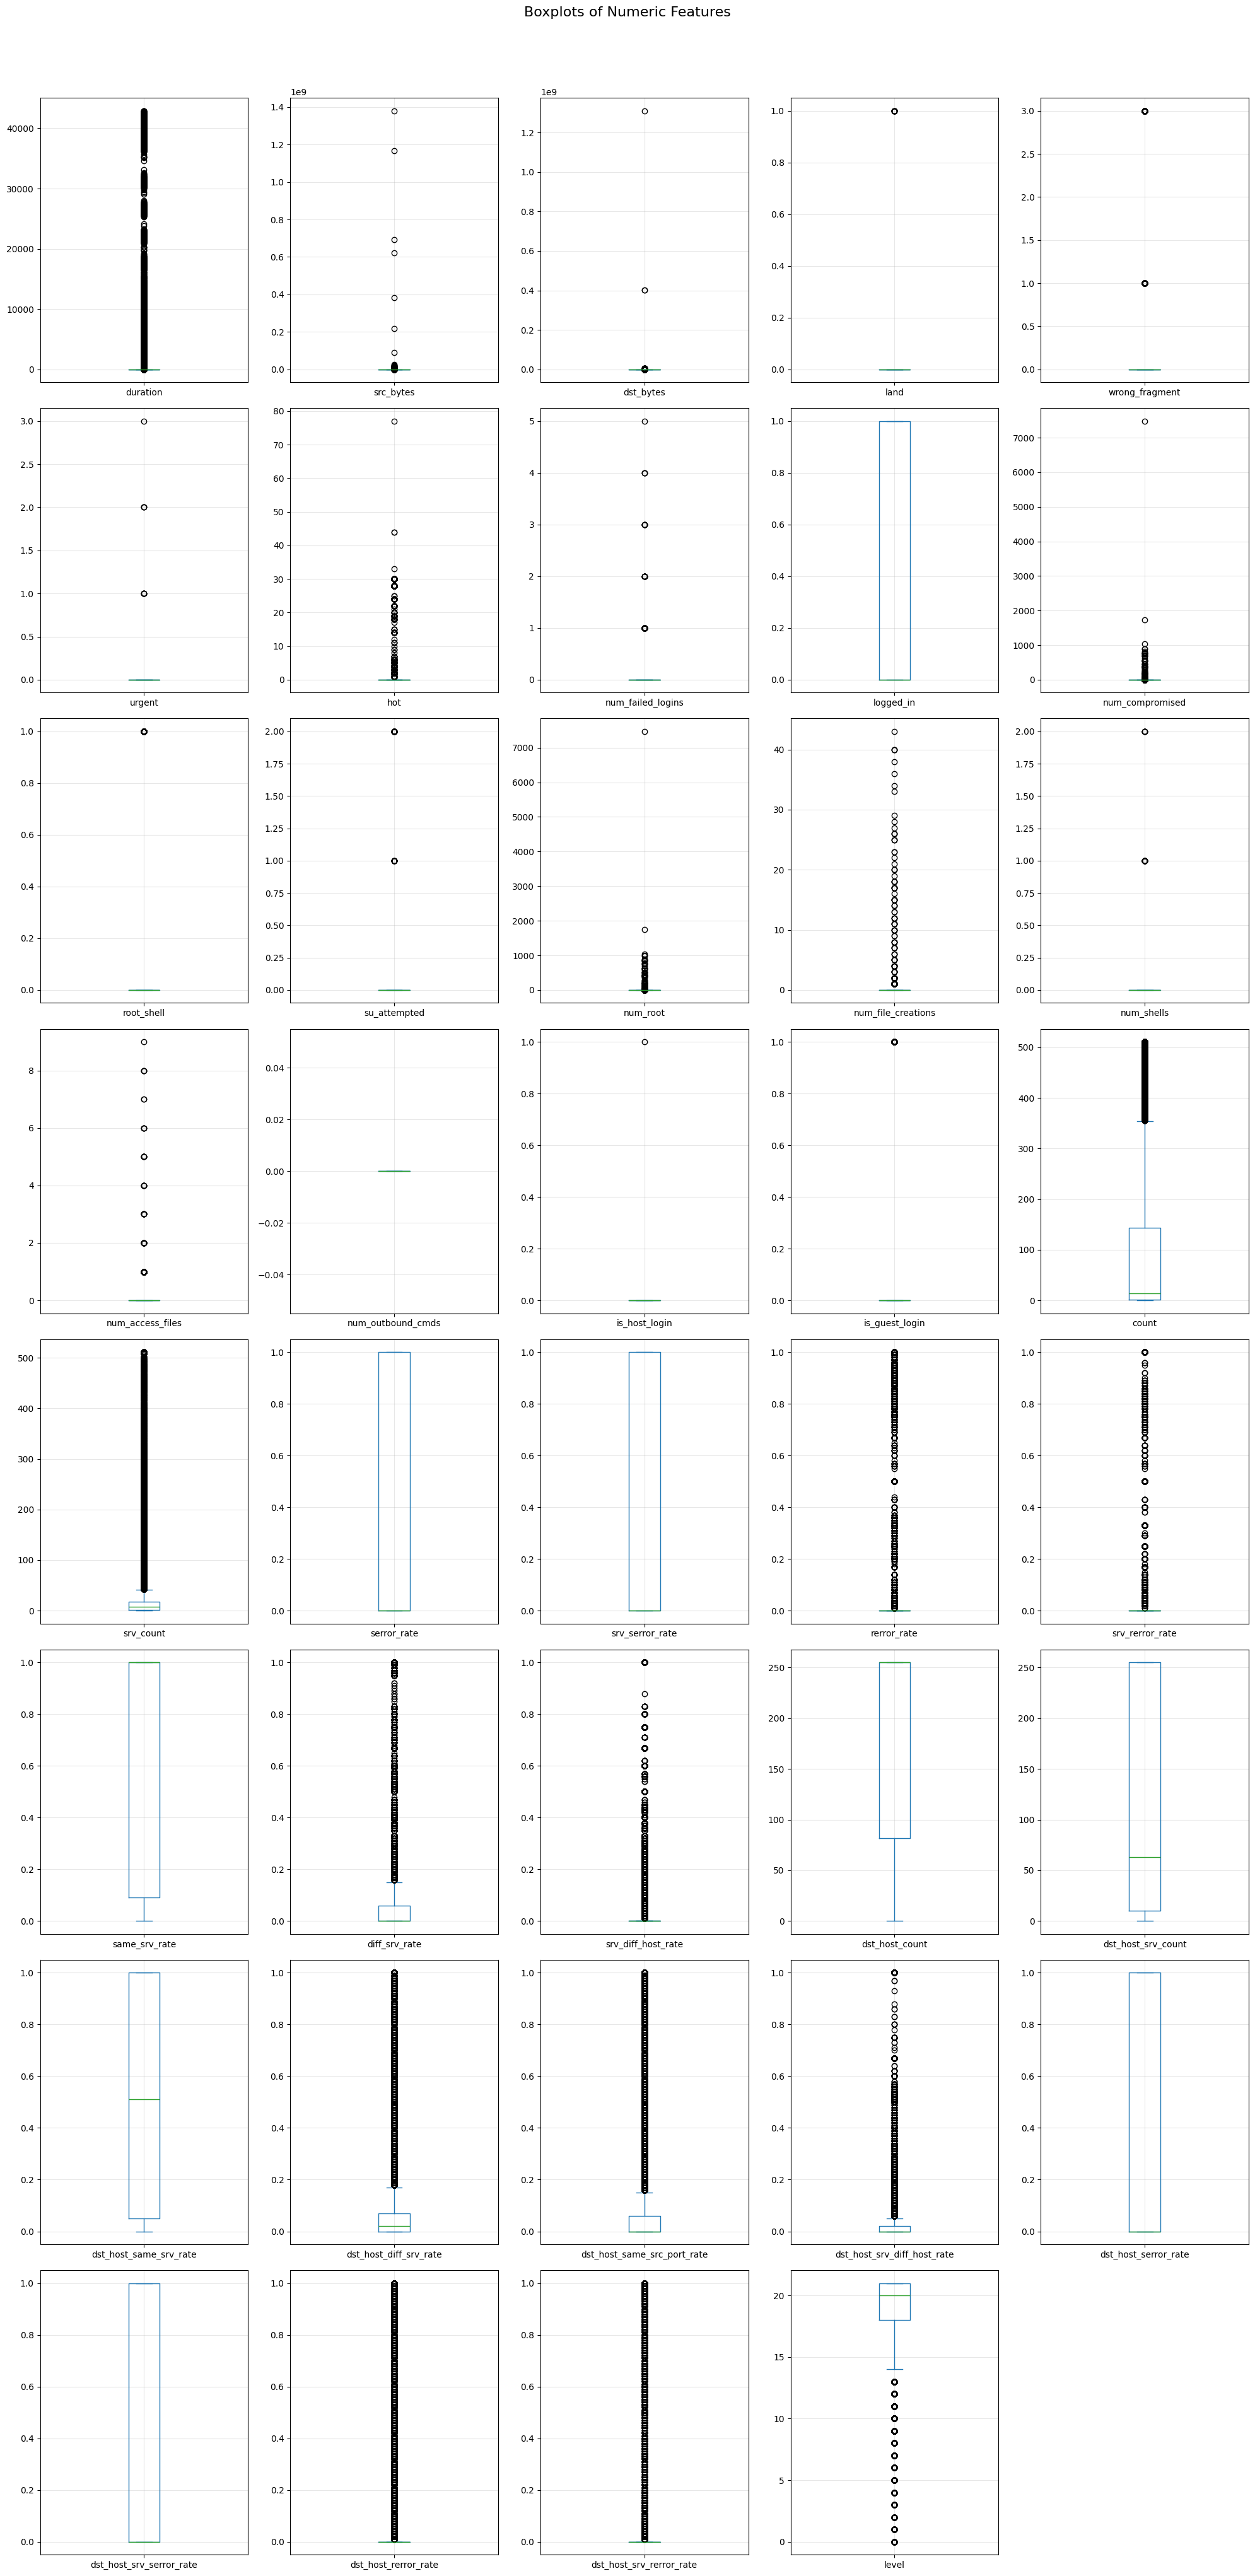

In [ ]:
# Boxplots for all numerical features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].plot(
    kind="box",
    subplots=True,
    layout=(len(numeric_cols)//5 + 1, 5),  # auto-adjust rows
    figsize=(20, 40),
    sharex=False,
    sharey=False
)

plt.suptitle("Boxplots of Numeric Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 3.4 Classifying Attacks In "attack" Column Into attack Or normal

In [ ]:
df['attack'] = np.where(df['attack'] == "normal", "normal", "attack")

df['attack'].unique()

array(['normal', 'attack'], dtype=object)

## 4.1 Target Variable Distribution

In [ ]:
plot_df = df.copy()
plot_df['attack_label'] = df['attack'].apply(lambda x: "normal" if x == "normal" else "attack")

plt.figure(figsize=(6,4))
plot_df['attack_label'].value_counts().plot(kind="bar", color=["green","red"], edgecolor="black")
plt.title("Normal vs Attack Distribution")
plt.ylabel("Count")
plt.show()

print("\nAttack types distribution:")
print(df['attack'].value_counts().head(10))

## 4.2 Protocol, Service, Flag Analysis

In [ ]:
categorical_cols = ['protocol_type', 'service', 'flag']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", edgecolor="black")
    plt.title(f"Top {col} Values")
    plt.ylabel("Count")
    plt.show()